In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Defining a Gaussian function
def gauss(a, mu, sigma, x):
    """Evaluates a gaussian with the given parameters"""
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

def calc_analytic_exp_value(del_x, x, g_x):
    """Analytically calculates the expected value of a Gaussian distribution"""
    return del_x * np.sum(x * g_x)

def calc_analytic_variance(del_x, x, mu, g_x):
    """Analytically calculates the variance of a Gaussian distribution"""
    return del_x * np.sum((x - mu)**2 * g_x)


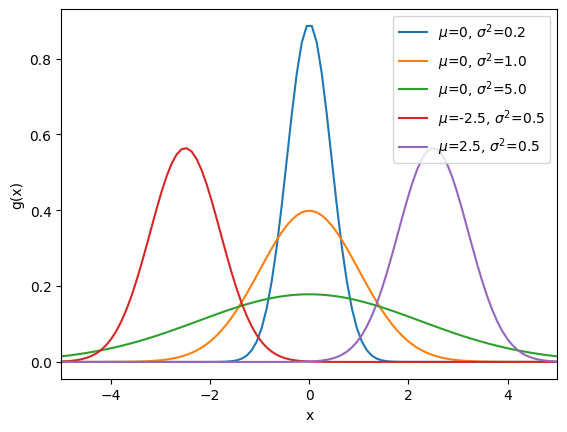

In [30]:
# Plotting Gaussians and calculating expecation value/variance analytically

x_vals = np.linspace(-5, 5, 100)
x_bin_width = 10/100

means = [0, 0, 0, -2.5, 2.5]
variances = [0.2, 1.0, 5.0, 0.5, 0.5] # Here, the variance is sigma^2
# Calculate the amplitudes with list comprehension
amplitudes = [1/(np.sqrt(var * 2 * np.pi)) for var in variances]

# These will be calculated analytically
analytic_exp_vals = []
analytic_variances = []

# Figure object
fig = plt.figure()

# Loop over each pair of mean, variance
for i in range(5):
    
    # Calculate expectation value and append to list
    analytic_exp_vals.append(calc_analytic_exp_value(x_bin_width, 
                                                     x_vals, 
                                                     gauss(amplitudes[i], means[i], np.sqrt(variances[i]), x_vals)
                                                    )
                            )
    
    # Calculate variance and append to list
    analytic_variances.append(calc_analytic_variance(x_bin_width, 
                                                     x_vals,
                                                     means[i],
                                                     gauss(amplitudes[i], means[i], np.sqrt(variances[i]), x_vals)
                                                    )
                            )
    
    # Plot the Gaussian
    plt.plot(x_vals, 
             gauss(amplitudes[i], means[i], np.sqrt(variances[i]), x_vals),
             label=f"$\mu$={means[i]}, $\sigma^2$={variances[i]}",
            )

plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-5, 5)

plt.legend()
plt.show(fig)

In [37]:
# Making a summary table of the Gaussian data

# Make a dicitonary with the data
gauss_data = {
    "expected mean": means,
    "analytical mean": analytic_exp_vals,
    "variance": variances,
    "analytical variance": analytic_variances,
    "normalization factor": amplitudes,
}

# Make a pandas dataframe with the data
gauss_df = pd.DataFrame(gauss_data)

gauss_df["mean error"] = np.abs(gauss_df["expected mean"] - gauss_df["analytical mean"])
gauss_df["variance error"] = np.abs(gauss_df["variance"] - gauss_df["analytical variance"])

print(gauss_df)

   expected mean  analytical mean  variance  analytical variance  \
0            0.0     3.660267e-17       0.2             0.198000   
1            0.0    -3.707887e-18       1.0             0.989988   
2            0.0    -4.163336e-17       5.0             4.135847   
3           -2.5    -2.474208e+00       0.5             0.493868   
4            2.5     2.474208e+00       0.5             0.493868   

   normalization factor    mean error  variance error  
0              0.892062  3.660267e-17        0.002000  
1              0.398942  3.707887e-18        0.010012  
2              0.178412  4.163336e-17        0.864153  
3              0.564190  2.579238e-02        0.006132  
4              0.564190  2.579238e-02        0.006132  


## Comparing numerical and analytical values

_How close is the expected mean to the analytical mean in each row?_

For the first three rows ($\mu = 0$), the analytical mean is less than 5e-17 units away from the actual mean. For the last two rows, ($\mu = \pm 2.5$), there is a much larger difference. The analytical mean is ~0.03 units away
from the actual mean.

_What about the variance values?_

The errors in the variance are highest for $\sigma^2 = 5$ (error = 0.86) and smallest for $\sigma^2 = 0.2$ (error = 0.002). The error in the analytic variance increases as the variance increases. 

_Is the error larger for the wider (larger variance) Gaussians? Why might that be?_

The error is larger for wider Gaussians. This is because the tails of the Gaussian go off to $\pm \infty$, while the above code only uses the points between $\pm 5$ to calculate the variance. The wider the Gaussian, the higher the value of the 

_What happens to the height of the curve as variance increases? Why?_

The height decreases as the variance increases. This is because the Gaussians are normalized to have an area under the curve of 1. Higher variance spreads out the Gaussian sideways, so to maintain the same overall area the height of the curve must decrease.
